In [105]:
netlist_data2 = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(1.57)pH fcheck
L2                 3         4   #SQUIDL1(1.57)pH fcheck
B1                 1         5   jjmod area=#JJAREA1(v=0.42,shunt = JJSHUNT1)
R1                 1         5   #JJSHUNT1(19.14)ohm
B2                 2         5   jjmod area=#JJAREA1(v=0.42)
R2                 2         5   #JJSHUNT1(19.14)ohm
B3                 4         2   pjjmod area=#PJJAREA1(20, fix = true, dp = false)
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.39)pH fcheck
L2                 3         4   #SQUIDL2(1.39)pH fcheck
B1                 1         5   jjmod area=#JJAREA2(v=0.39, shunt = JJSHUNT2)
R1                 1         5   #JJSHUNT2(22.07)ohm
B2                 2         5   jjmod area=#JJAREA2(v=0.39)
R2                 2         5   #JJSHUNT2(22.07)ohm
B3                 4         2   pjjmod area=#PJJAREA2(20, fix = true, dp = false)
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(1.6)pH fcheck
L2                 3         4   #SQUIDL3(1.6)pH fcheck
B1                 1         5   jjmod area=#JJAREA3(v=0.38, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT3(20.71)ohm
B2                 2         5   jjmod area=#JJAREA3(v=0.38)
R2                 2         5   #JJSHUNT3(20.71)ohm
B3                 4         2   pjjmod area=#PJJAREA3(20, fix = true, dp = false)
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    #DCHFQR1(1090, dpv = 20)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(44, dpv = 13)pH fcheck
X1       psquid1         3        4
L3                      4        5    #DCHFQL2(4.27)pH fcheck
L4                      5        6    #DCHFQL3(2.00, fix = true, dp=False)pH fcheck
R1                      100      5    #DCHFQR2(100)ohm
X2       psquid2         6        0
.ends

.subckt JTL     1  5  100
L1               1  2   #JTLL1(14.28)pH fcheck
L2               2  3   #JTLL1(14.28)pH fcheck
L3               3  4   #JTLL1(14.28)pH fcheck
L4               4  5   #JTLL1(14.28)pH fcheck
X1    psquid3     3  0
X2    psquid3     5  0
R1               100  4   #JTLR1(135)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin                     1   0    PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   840ps 0mV 850ps 25mV 950ps 25mV 960ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X1      DCHFQ           1   2  100
X2      JTL4            2   3   100
X3      JTL4            3   4   100
X4      JTL4            4   5   100

R2                      5     13  8.32ohm
L5                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=1.2,fix = true, dp = false)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps

.print phase B1|X1|X1|X2
.print phase B2|X1|X1|X2


.print phase B1|X1|X1|X4
.print phase B2|X1|X1|X4

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
* 許容できるパルスの遅延
* PulseDelay=4.0e-11
"""

--- List of variables to optimize ---
              def     main      sub element    fix     shunt     dp   dpv  tmp
char                                                                          
SQUIDL1      1.57     1.57     1.57       L    0.0      None    1.0   7.0  0.0
JJAREA1      0.42     0.42     0.42       B  False  JJSHUNT1   True   7.0  0.0
JJSHUNT1    19.14    19.14    19.14       R  False      None   True   7.0  0.0
PJJAREA1    20.00    20.00    20.00       B   True      None  False   7.0  0.0
SQUIDL2      1.39     1.39     1.39       L  False      None   True   7.0  0.0
JJAREA2      0.39     0.39     0.39       B  False  JJSHUNT2   True   7.0  0.0
JJSHUNT2    22.07    22.07    22.07       R  False      None   True   7.0  0.0
PJJAREA2    20.00    20.00    20.00       B   True      None  False   7.0  0.0
SQUIDL3      1.60     1.60     1.60       L  False      None   True   7.0  0.0
JJAREA3      0.38     0.38     0.38       B  False  JJSHUNT3   True   7.0  0.0
JJSHUNT3    20

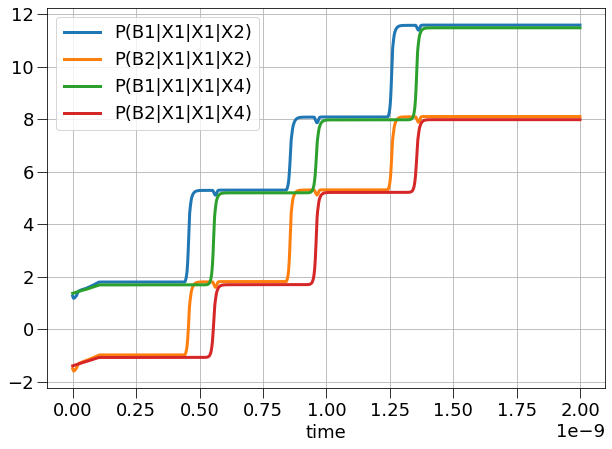

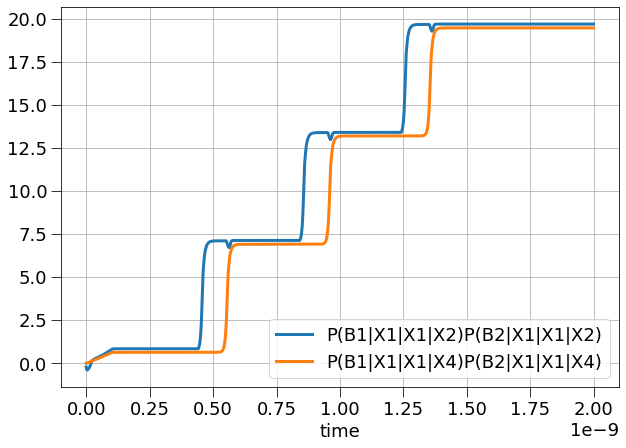

In [106]:
import importlib
from optimize import data2
importlib.reload(data2)

d = data2.Data(netlist_data2, True)

,low(value),low(%),high(value),high(%)
PJJAREA1,2.109375,-89.453125,40.000000,100.00000
JJSHUNT1,0.448594,-97.656250,38.280000,100.00000
PJJAREA2,1.093750,-94.531250,40.000000,100.00000
SQUIDL2,0.005430,-99.609375,2.780000,100.00000
JJSHUNT2,2.241484,-89.843750,44.140000,100.00000
JJAREA1,0.098437,-76.562500,0.531562,26.56250
SQUIDL1,0.006133,-99.609375,2.686172,71.09375
JJAREA2,0.001523,-99.609375,0.594141,52.34375
DCHFQR1,783.437500,-28.125000,2180.000000,100.00000
PJJAREA3,3.515625,-82.421875,40.000000,100.00000


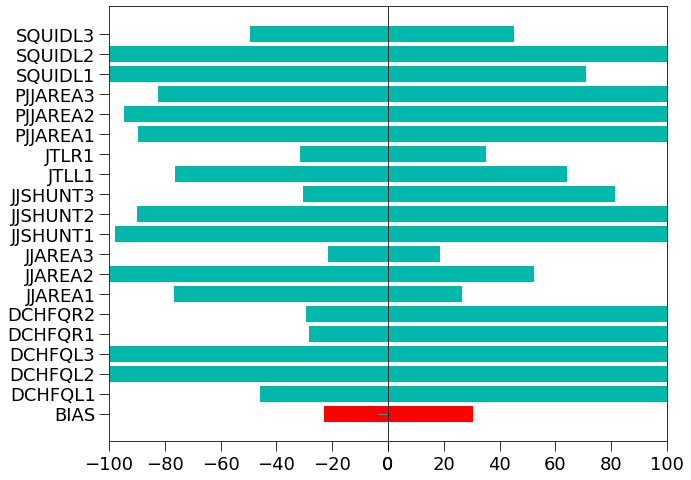

In [107]:
d.get_margins(plot=True)

In [108]:
d.optimize("/home/tanetakumi/main/hfq-optimizer/template/optimize/optimize-data15")

0:0:0の最適化
最小マージン :  JJAREA3    17.1875
最適値の更新0:0:0の最適化   17.1875 %
0:0:1の最適化
最小マージン :  JJAREA3    20.312499999999996
最適値の更新0:0:1の最適化   20.312499999999996 %
0:1:0の最適化
最小マージン :  JJAREA3    11.718749999999991
0:1:1の最適化
最小マージン :  JJAREA3    19.531250000000014
0:2:0の最適化
最小マージン :  JJAREA3    16.40625
0:2:1の最適化
最小マージン :  JJAREA3    19.53125000000001
0:3:0の最適化
最小マージン :  JJAREA3    10.156250000000009
0:3:1の最適化
最小マージン :  JJAREA3    19.53125000000001
0:4:0の最適化
最小マージン :  JJAREA3    16.40624999999998
0:4:1の最適化
最小マージン :  JJAREA3    20.31249999999999
0:5:0の最適化
最小マージン :  JJAREA3    18.75000000000001
0:5:1の最適化
最小マージン :  JJAREA3    19.531249999999993
0:6:0の最適化
最小マージン :  JJAREA3    9.375000000000007
0:6:1の最適化
最小マージン :  JJAREA3    19.53125
0:7:0の最適化
最小マージン :  JJAREA3    7.03125000000002
0:7:1の最適化
最小マージン :  JJAREA3    20.312499999999993
0:8:0の最適化
最小マージン :  JJAREA3    7.031250000000007
0:8:1の最適化
最小マージン :  JJAREA3    19.53125000000001
0:9:0の最適化
最小マージン :  JJAREA3    19.531250000000007
0:9:1の最適化
最小マージン :  JJAR